In [1]:
import pandas as pd

## Carregando Base de Dados

In [2]:
enem = pd.read_csv('src/enem_2019.csv', index_col=[0])

In [3]:
enem.head()

,NU_INSCRICAO,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
0,190001595656,2019,36,3,1,1,M,Sorocaba,SP,1,...,0,0,0,0,B,B,A,A,2,A
1,190001421546,2019,23,1,1,1,M,Feira de Santana,BA,1,...,0,0,0,0,C,E,B,B,4,C
2,190001133210,2019,39,3,1,1,F,Fortaleza,CE,1,...,0,0,0,0,E,E,B,C,2,B
3,190001199383,2019,25,1,1,1,F,Palmas,TO,1,...,0,0,0,0,C,E,B,D,4,E
4,190001237802,2019,22,1,1,1,F,Contagem,MG,1,...,0,0,0,0,E,E,C,C,3,G


In [4]:
enem.set_index('NU_INSCRICAO', drop=True, inplace=True)

## Verificando Valores NAN

In [5]:
def verfify_nan_values(df):
    var_without_nan = []
    total = df.shape[0]
    for index, value in df.isna().sum().iteritems():
        if value == 0:
            var_without_nan.append(index)
        else:
            percent_with_nan = (value / total) * 100
            print("A variável {} tem {}% de valores NAN".format(index, percent_with_nan))

In [6]:
verfify_nan_values(enem)

A variável TP_ENSINO tem 20.849999999999998% de valores NAN
A variável NU_NOTA_CN tem 30.4% de valores NAN
A variável NU_NOTA_CH tem 25.85% de valores NAN
A variável NU_NOTA_LC tem 25.85% de valores NAN
A variável NU_NOTA_MT tem 30.4% de valores NAN
A variável NU_NOTA_COMP1 tem 25.85% de valores NAN
A variável NU_NOTA_COMP2 tem 25.85% de valores NAN
A variável NU_NOTA_COMP3 tem 25.85% de valores NAN
A variável NU_NOTA_COMP4 tem 25.85% de valores NAN
A variável NU_NOTA_COMP5 tem 25.85% de valores NAN
A variável NU_NOTA_REDACAO tem 25.85% de valores NAN


In [7]:
enem_without_nan = enem.dropna(subset = ['NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_COMP1', 'TP_ENSINO'])

In [8]:
verfify_nan_values(enem_without_nan)

In [9]:
enem_without_nan.shape

(1134, 33)

In [10]:
enem_without_nan.head()

,NU_ANO,NU_IDADE,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_SEXO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,...,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q005,Q006
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,2019,22,1,1,1,F,Contagem,MG,1,1.0,...,0,0,0,0,E,E,C,C,3,G
190001421548,2019,22,3,1,1,F,Paulo Afonso,BA,1,1.0,...,0,0,0,0,E,B,C,B,3,B
190001592266,2019,17,1,1,1,M,São Paulo,SP,2,1.0,...,0,0,0,0,E,E,B,B,5,F
190001475147,2019,19,4,1,1,M,Santa Maria,RN,1,1.0,...,0,0,0,0,B,C,C,A,4,C
190001867756,2019,23,1,2,1,F,Araucária,PR,1,1.0,...,0,0,0,0,D,B,F,B,3,C


## Tipos de Variáveis

### Variáveis Qualitativas

In [11]:
enem_types = enem_without_nan[[
'NU_ANO',
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'TP_NACIONALIDADE',
'NO_MUNICIPIO_RESIDENCIA',
'SG_UF_RESIDENCIA',
'TP_ST_CONCLUSAO',
'TP_ENSINO',
'IN_BRAILLE',
'IN_AMPLIADA_18',
'IN_AMPLIADA_24',
'IN_LEDOR',
'IN_ACESSO',
'IN_TRANSCRICAO',
'IN_LIBRAS',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006']]

enem_types.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q006
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,2019,F,1,1,1,Contagem,MG,1,1.0,0,...,0,0,0,0,0,E,E,C,C,G
190001421548,2019,F,3,1,1,Paulo Afonso,BA,1,1.0,0,...,0,0,0,0,0,E,B,C,B,B
190001592266,2019,M,1,1,1,São Paulo,SP,2,1.0,0,...,0,0,0,0,0,E,E,B,B,F
190001475147,2019,M,4,1,1,Santa Maria,RN,1,1.0,0,...,0,0,0,0,0,B,C,C,A,C
190001867756,2019,F,1,2,1,Araucária,PR,1,1.0,0,...,0,0,0,0,0,D,B,F,B,C


NU_INSCRICAO
NU_ANO
TP_SEXO
TP_COR_RACA
TP_ESTADO_CIVIL
TP_NACIONALIDADE
NO_MUNICIPIO_RESIDENCIA
SG_UF_RESIDENCIA
TP_ST_CONCLUSAO
TP_ENSINO
IN_BRAILLE
IN_AMPLIADA_18
IN_AMPLIADA_24
IN_LEDOR
IN_ACESSO
IN_TRANSCRICAO
IN_LIBRAS
Q001
Q002
Q003
Q004
Q005
Q006

#### 2. NU_ANO -> VARIÁVEL QUALITATIVA ORDINAL

In [12]:
enem_types.NU_ANO = enem_types.NU_ANO.astype('category')

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### 3. TP_SEXO -> VARIÁVEL QUALITATIVA NOMINAL DICOTÔMICA

In [13]:
enem_types.TP_SEXO = enem_types.TP_SEXO.astype('category')

#### 4. TP_ESTADO_CIVIL -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [14]:
enem_types.TP_ESTADO_CIVIL = enem_types.TP_ESTADO_CIVIL.astype('category')

#### 5. TP_COR_RACA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [15]:
enem_types.TP_COR_RACA = enem_types.TP_COR_RACA.astype('category')

#### 6. TP_NACIONALIDADE -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [16]:
enem_types.TP_NACIONALIDADE = enem_types.TP_NACIONALIDADE.astype('category')

#### 7. NO_MUNICIPIO_RESIDENCIA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [17]:
enem_types.NO_MUNICIPIO_RESIDENCIA = enem_types.NO_MUNICIPIO_RESIDENCIA.astype('category')

#### 8. SG_UF_RESIDENCIA -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [18]:
enem_types.SG_UF_RESIDENCIA = enem_types.SG_UF_RESIDENCIA.astype('category')

#### 9. TP_ST_CONCLUSAO -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [19]:
enem_types.TP_ST_CONCLUSAO = enem_types.TP_ST_CONCLUSAO.astype('category')

#### 10. TP_ENSINO -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [20]:
enem_types.TP_ENSINO = enem_types.TP_ENSINO.astype('category')

#### 11. Q001 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [21]:
enem_types.Q001 = enem_types.Q001.astype('category')

#### 12. Q002 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [22]:
enem_types.Q002 = enem_types.Q002.astype('category')

#### 13. Q003 -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [23]:
enem_types.Q003 = enem_types.Q003.astype('category')

#### 14. Q004 -> VARIÁVEL QUALITATIVA NOMINAL POLICOTÔMICA

In [24]:
enem_types.Q004 = enem_types.Q004.astype('category')

#### 15. Q006 -> VARIÁVEL QUALITATIVA ORDINAL POLICOTÔMICA

In [25]:
enem_types.Q006 = enem_types.Q006.astype('category')

Renda Mensal

### Variáveis Quantitativas

In [26]:
enem_quant = enem_without_nan[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO',
'Q005']]

enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,
190001237802,22,513.6,575.5,570.7,677.0,160.0,120.0,180.0,200.0,200.0,860.0,3
190001421548,22,484.6,488.4,507.2,594.7,140.0,120.0,120.0,160.0,60.0,600.0,3
190001592266,17,543.9,548.1,502.5,480.7,120.0,40.0,120.0,120.0,0.0,400.0,5
190001475147,19,518.2,351.7,417.6,459.0,120.0,120.0,120.0,120.0,20.0,500.0,4
190001867756,23,373.8,393.6,451.0,484.7,120.0,40.0,40.0,100.0,0.0,300.0,3


NU_IDADE
NU_NOTA_CN
NU_NOTA_CH
NU_NOTA_LC
NU_NOTA_MT
NU_NOTA_COMP1
NU_NOTA_COMP2
NU_NOTA_COMP3
NU_NOTA_COMP4
NU_NOTA_COMP5
NU_NOTA_REDACAO

#### 16. NU_IDADE -> VARIÁVEL QUANTITATIVA DISCRETA

#### 17. NU_NOTA_CN -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 18. NU_NOTA_CH -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 19. NU_NOTA_LC -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 20. NU_NOTA_MT -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 21. NU_NOTA_REDACAO -> VARIÁVEL QUANTITATIVA CONTÍNUA

#### 22. Q005 -> VARIÁVEL QUANTITATIVA DISCRETA

Quantidade de Pessoas na Residência

## Tratando Outliers

In [27]:
enem_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,
190001237802,22,513.6,575.5,570.7,677.0,160.0,120.0,180.0,200.0,200.0,860.0,3
190001421548,22,484.6,488.4,507.2,594.7,140.0,120.0,120.0,160.0,60.0,600.0,3
190001592266,17,543.9,548.1,502.5,480.7,120.0,40.0,120.0,120.0,0.0,400.0,5
190001475147,19,518.2,351.7,417.6,459.0,120.0,120.0,120.0,120.0,20.0,500.0,4
190001867756,23,373.8,393.6,451.0,484.7,120.0,40.0,40.0,100.0,0.0,300.0,3


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
def analise_outliers(df):
    fig, axes = plt.subplots(4,5, figsize=(25,40))

    n_column = 0
    for i in range(0,4):
        for j in range(0,5):
            if i == 3 and j == 2:
                break
            else:
                axes[i,j].boxplot(x = df.iloc[:, n_column], data = df)
                axes[i, j].set_title(df.columns[n_column])
                n_column += 1

In [30]:
def plot_box_plot(df):
    plt.figure(figsize = (25,40))
    Features = df.columns
    for i in range(len(Features)):
        plt.subplot(6,3, i + 1)
        sns.boxplot(y = df[Features[i]], data = df)
        plt.title(f"Boxplot of {Features[i]}")
        plt.tight_layout()

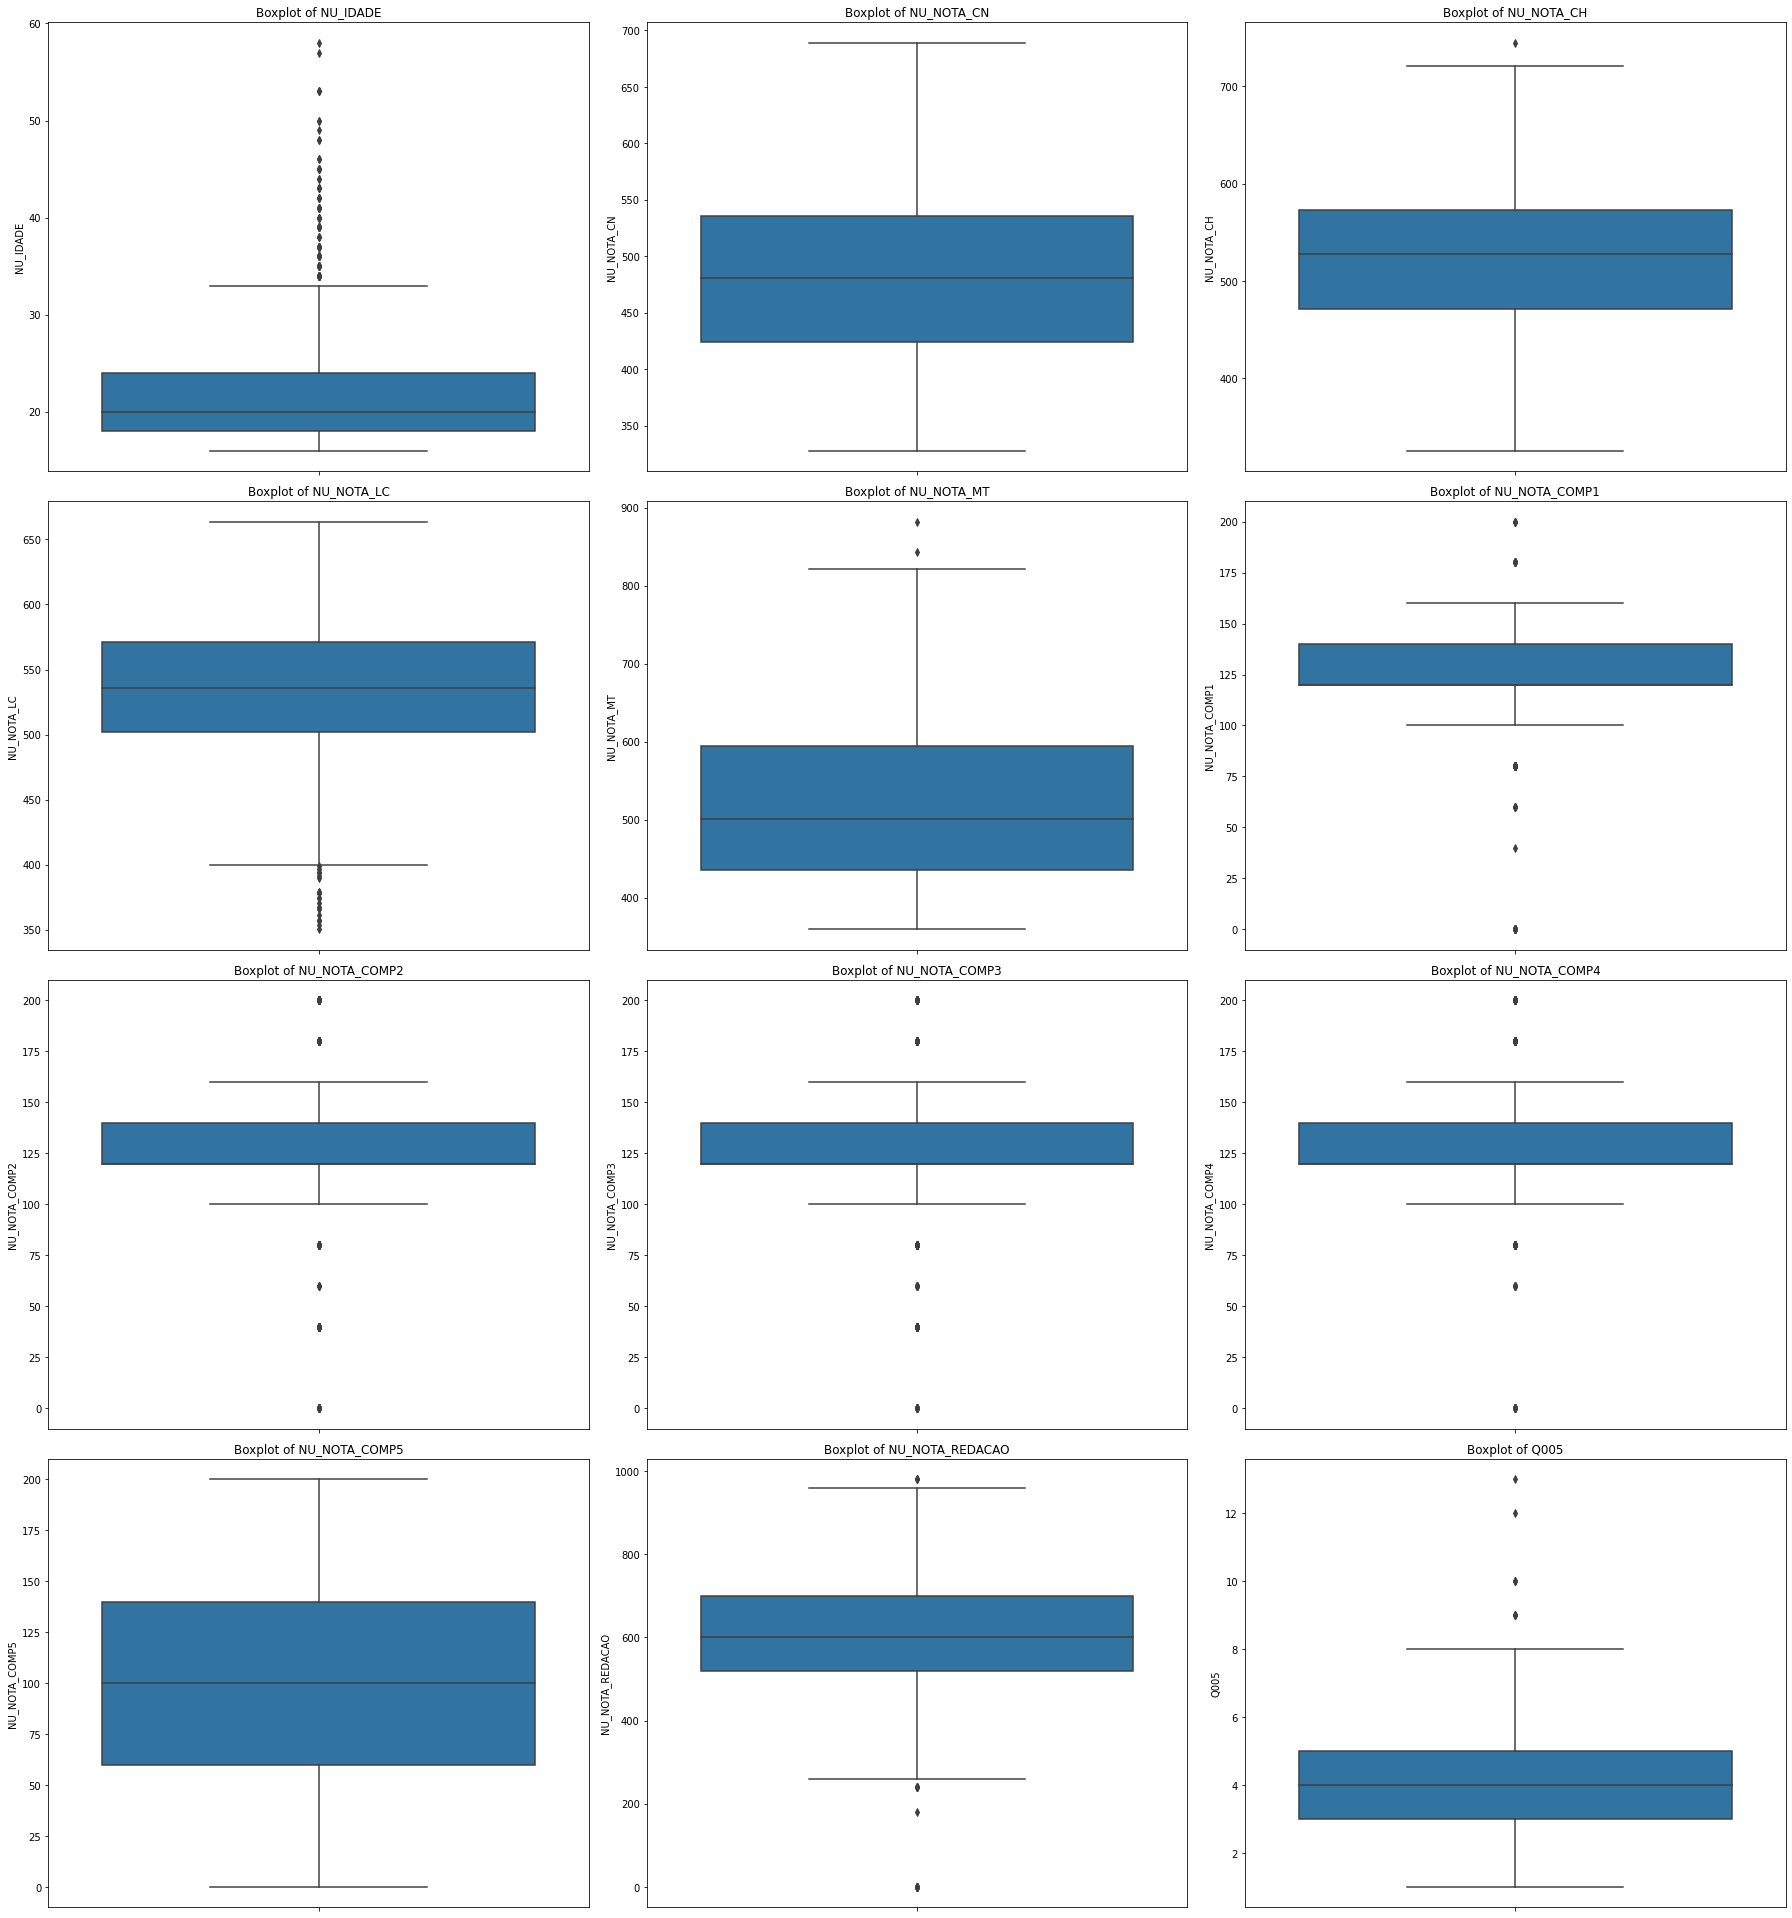

In [31]:
plot_box_plot(enem_quant)

In [32]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    ric = Q3 - Q1
    li = Q1 - (1.5 * ric)
    ls = Q3 + (1.5 * ric)
    return li, ls

In [33]:
enem_quant_without_outlies = enem_quant.copy()

In [34]:
columns_list = enem_quant_without_outlies.columns
for i in columns_list:
    li, ls = detect_outliers(enem_quant_without_outlies[i])
    enem_quant_without_outlies[i] = np.where(enem_quant_without_outlies[i] > ls, ls,enem_quant_without_outlies[i])
    enem_quant_without_outlies[i] = np.where(enem_quant_without_outlies[i] < li, li,enem_quant_without_outlies[i])

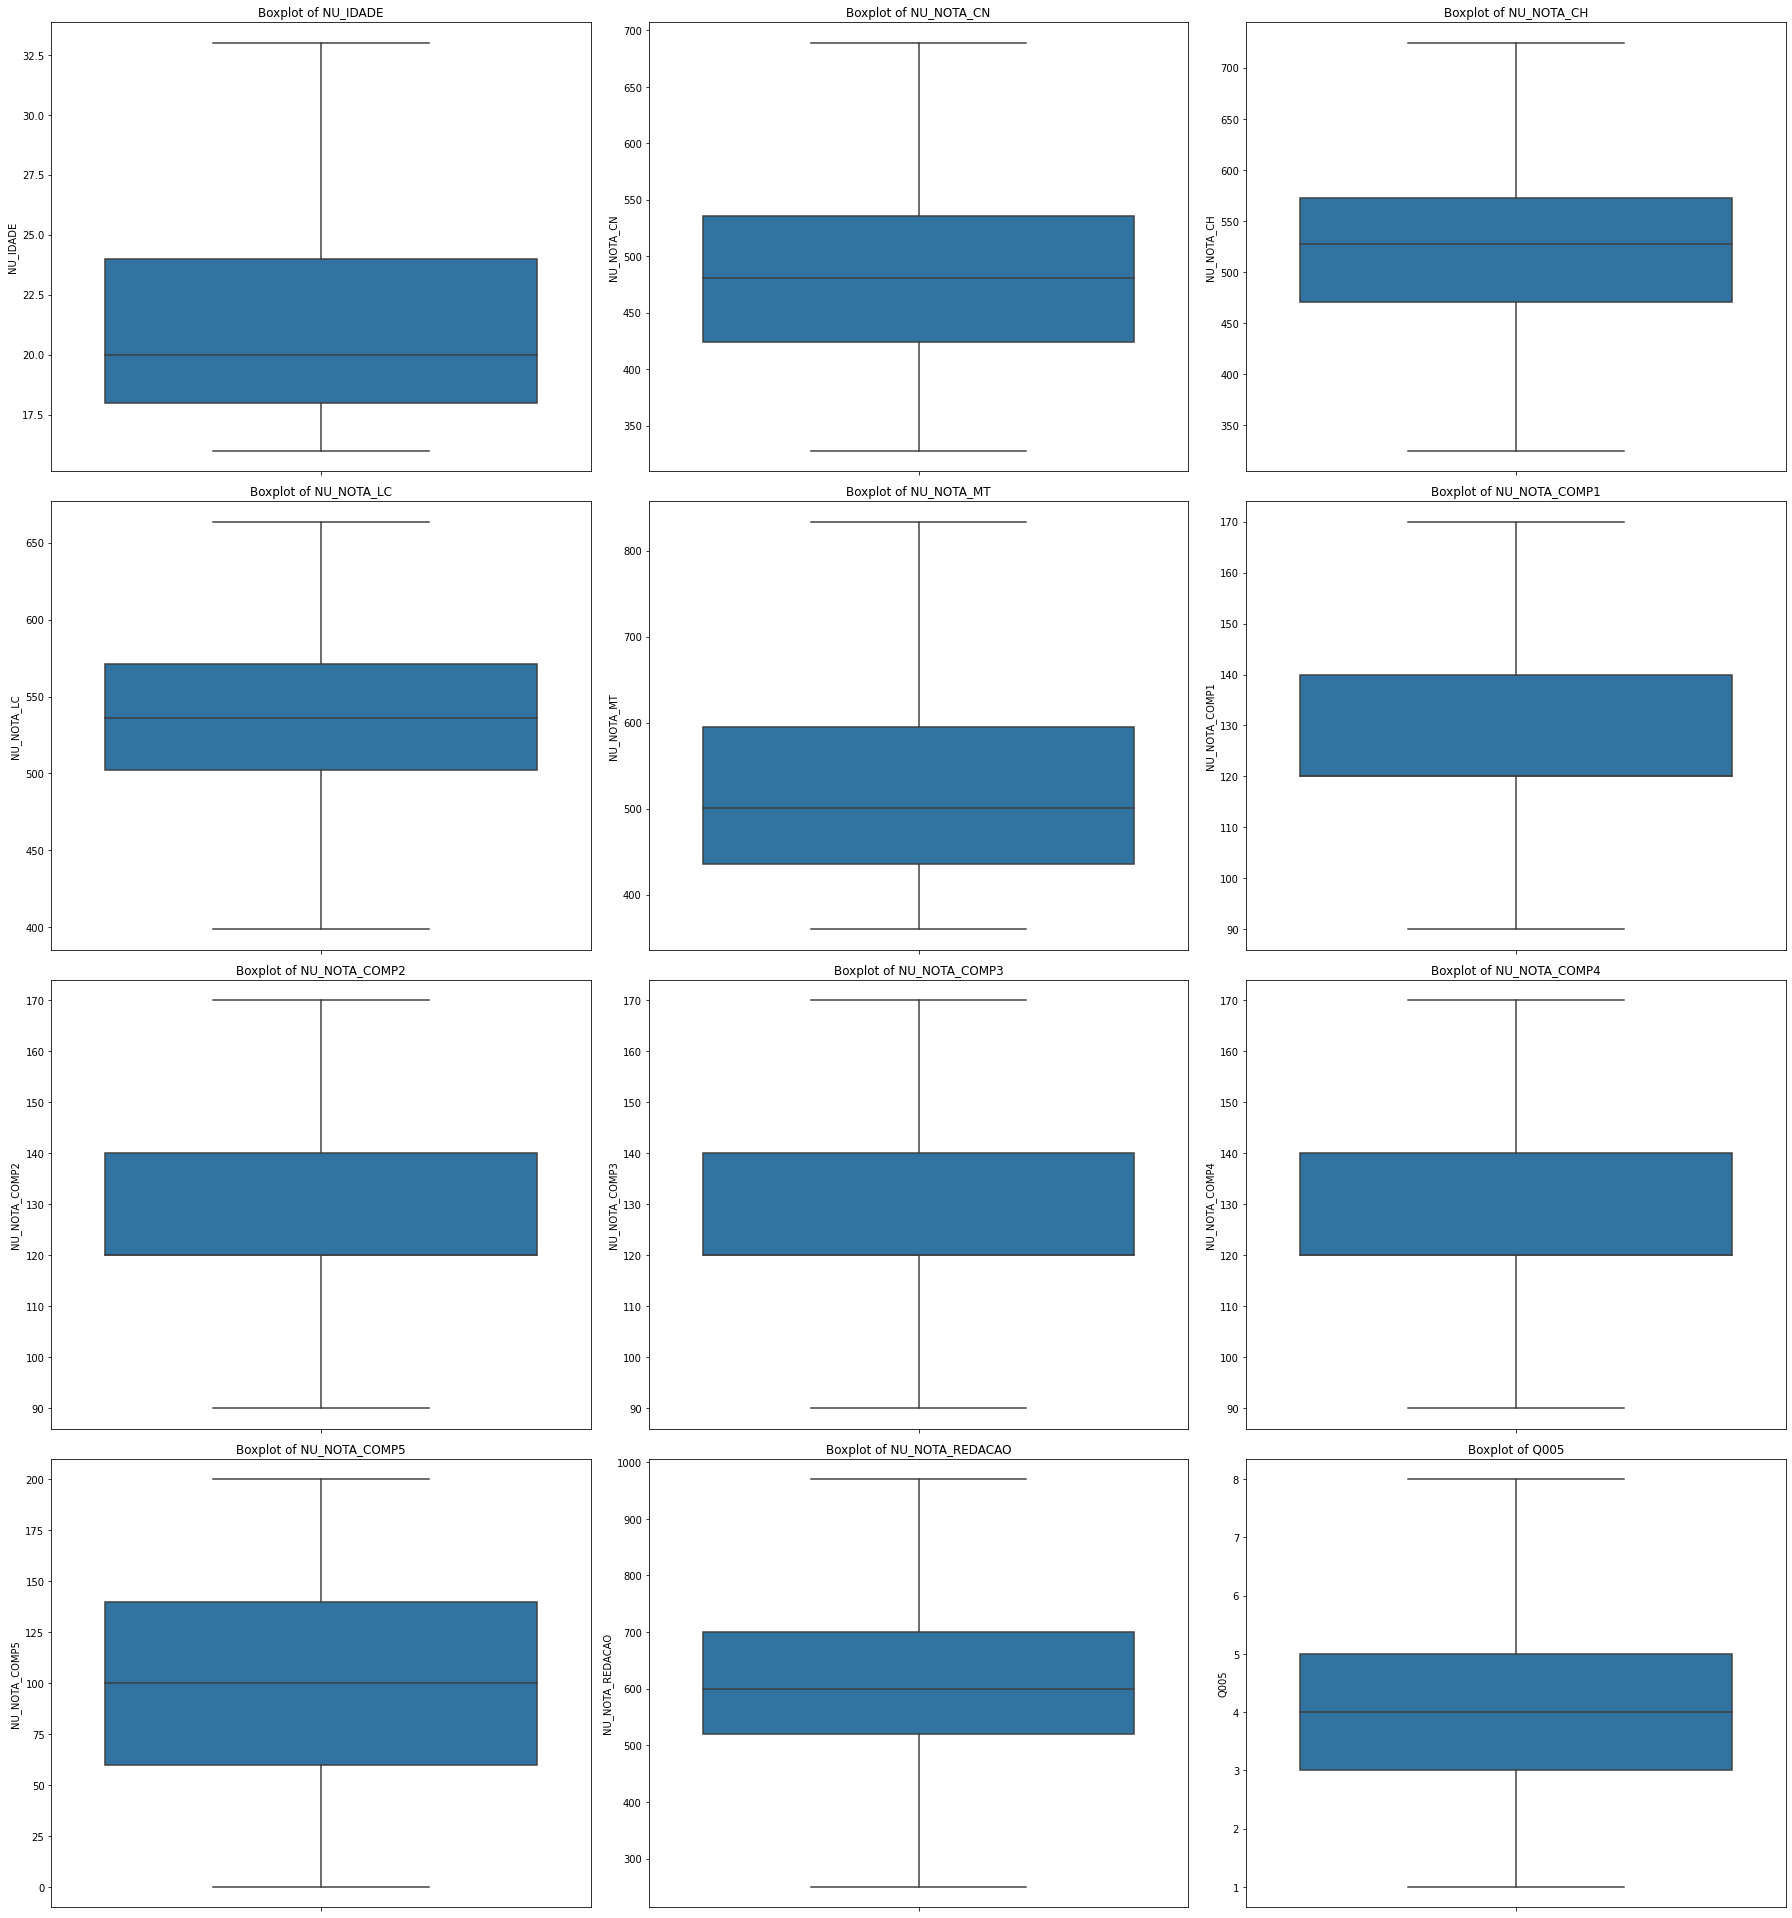

In [35]:
plot_box_plot(enem_quant_without_outlies)

## Gráficos de Análises

In [36]:
import statistics
from scipy import stats


In [37]:
def statistic_analytics(lista, column):
  m = statistics.mean(lista)
  m0 = statistics.mode(lista)
  md = statistics.median(lista)

  # Coeficiente de variação (CV)
  cv = (statistics.stdev(lista) / m)*100

  # Assimetria
  assimetria = stats.skew(lista)

  # Curtose
  curtose = stats.kurtosis(lista)

  print("Coluna = {} CV = {:.2f}% , Assimetria = {:.2f}, Curtose = {:.2f}".format(column, cv, assimetria, curtose))

In [38]:
enem_quant_without_outlies.columns

Index(['NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q005'],
      dtype='object')

Coluna = NU_IDADE CV = 23.20% , Assimetria = 1.11, Curtose = -0.02
Coluna = NU_NOTA_CN CV = 15.12% , Assimetria = 0.20, Curtose = -0.62
Coluna = NU_NOTA_CH CV = 13.97% , Assimetria = -0.22, Curtose = -0.29
Coluna = NU_NOTA_LC CV = 9.74% , Assimetria = -0.36, Curtose = -0.06
Coluna = NU_NOTA_MT CV = 20.21% , Assimetria = 0.63, Curtose = -0.36
Coluna = NU_NOTA_COMP1 CV = 16.53% , Assimetria = 0.18, Curtose = -0.76
Coluna = NU_NOTA_COMP2 CV = 17.95% , Assimetria = 0.48, Curtose = -0.71
Coluna = NU_NOTA_COMP3 CV = 18.68% , Assimetria = 0.40, Curtose = -0.69
Coluna = NU_NOTA_COMP4 CV = 19.39% , Assimetria = 0.31, Curtose = -0.98
Coluna = NU_NOTA_COMP5 CV = 55.13% , Assimetria = -0.32, Curtose = -0.68
Coluna = NU_NOTA_REDACAO CV = 24.51% , Assimetria = 0.04, Curtose = 0.05
Coluna = Q005 CV = 35.63% , Assimetria = 0.62, Curtose = 0.63


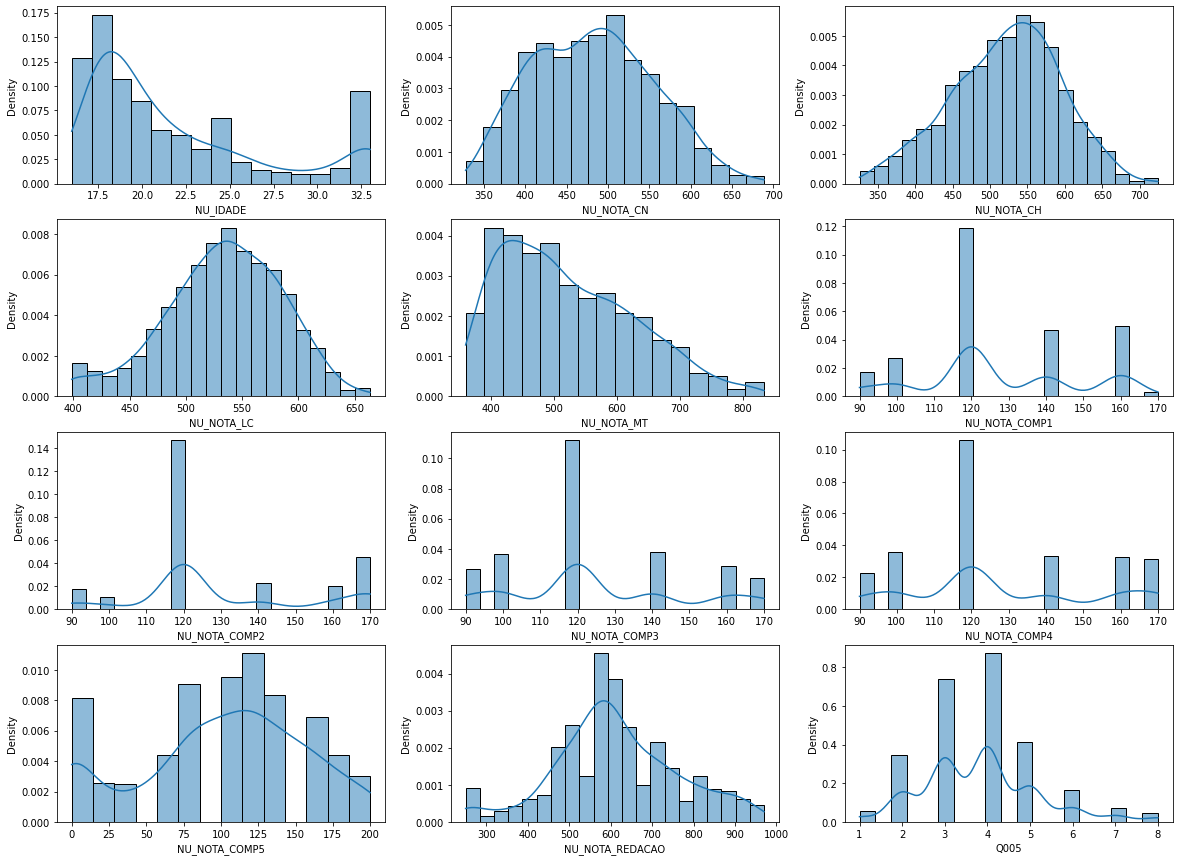

In [39]:
fig, axes = plt.subplots(4, 3, figsize=(20,15))

linha = 0
coluna = 0
for i in enem_quant_without_outlies.columns:
    lista = enem_quant_without_outlies[i]

    statistic_analytics(lista, i)

    sns.histplot(ax=axes[linha,coluna], data=lista, stat="density", kde=True)

    coluna = coluna + 1

    if coluna > 2:
        coluna = 0
        linha = linha + 1


### Resultados

* 'NU_IDADE' - Assimetrica positiva, curva com distribuição normal
* 'NU_NOTA_CN' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_CH' - Assimetrica negativa, curva com distribuição achatada
* 'NU_NOTA_LC' - Assimetrica negativa, curva com distribuição normal
* 'NU_NOTA_MT' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP1' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP2' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP3' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP4' - Assimetrica positiva, curva com distribuição achatada
* 'NU_NOTA_COMP5' - Assimetrica negativa, curva com distribuição achatada
* 'NU_NOTA_REDACAO' - Assimetrica, curva com distribuição normal
* 'Q005' - Assimetrica positiva, curva com distribuição alongada

## Correlações

In [40]:
enem_types.shape

(1134, 21)

In [41]:
enem_quant_without_outlies.shape

(1134, 12)

In [42]:
enem_total = pd.concat([enem_types, enem_quant_without_outlies], axis=1)

### Correlação de Pearson

Variáveis Quantitativas

<AxesSubplot:>

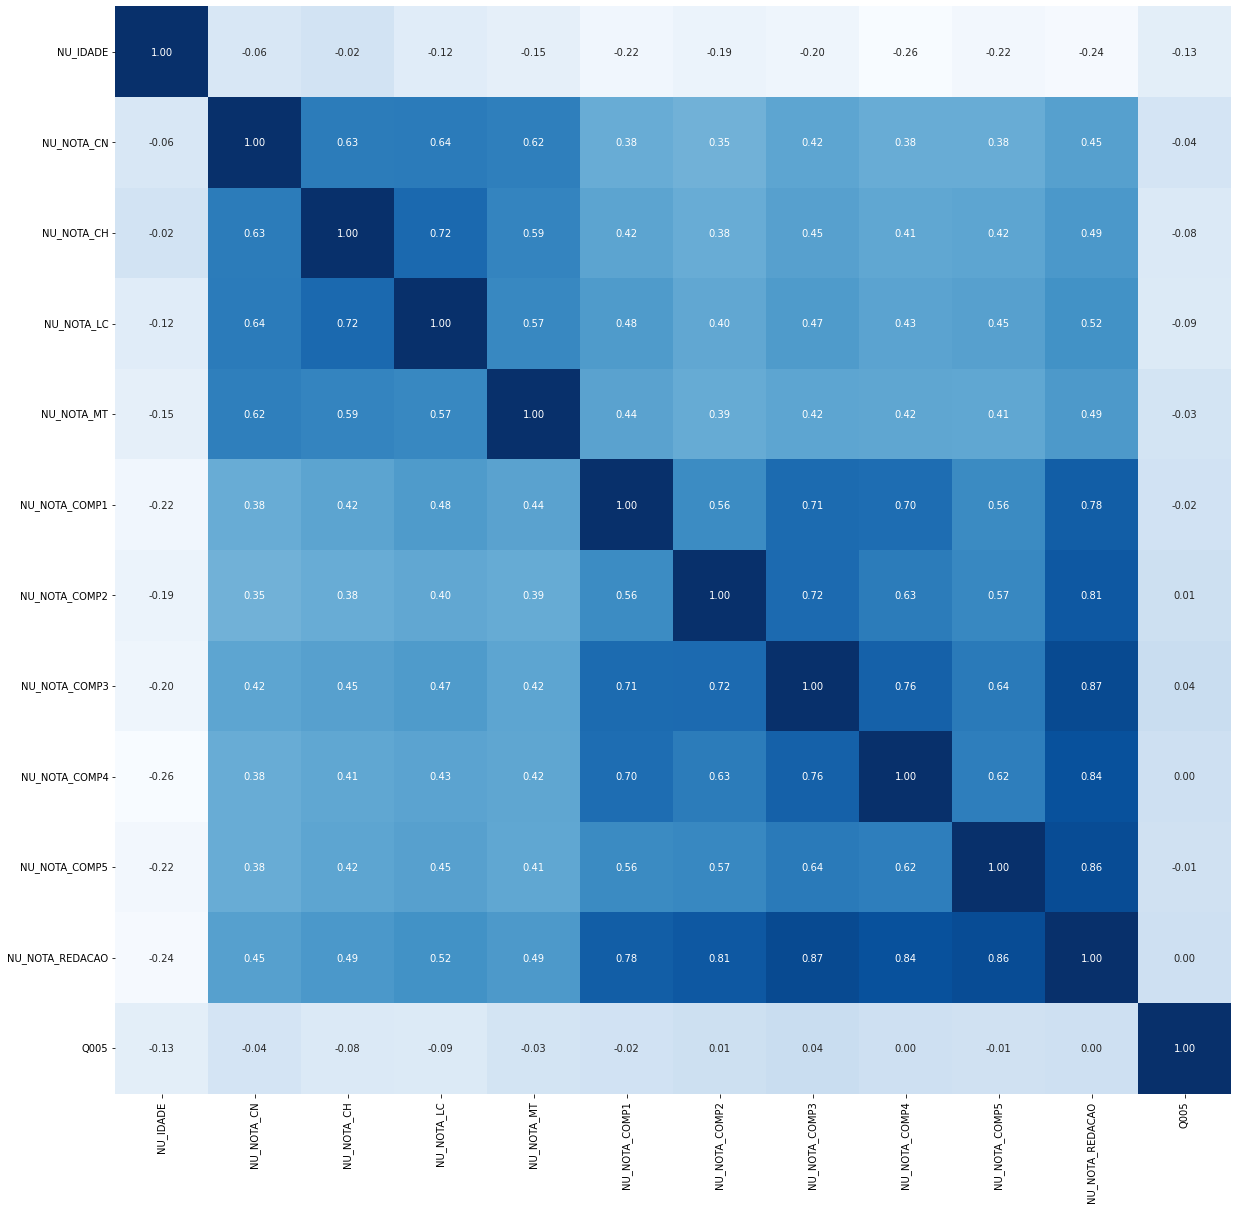

In [43]:
fig = plt.figure(figsize=(20,20))

corr = np.corrcoef(enem_quant_without_outlies.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=enem_quant_without_outlies.columns, yticklabels=enem_quant_without_outlies.columns)


### Correlação de Spearman

Variáveis categoricas

In [44]:
enem_types.columns

Index(['NU_ANO', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESTADO_CIVIL',
       'TP_NACIONALIDADE', 'NO_MUNICIPIO_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'TP_ST_CONCLUSAO', 'TP_ENSINO', 'IN_BRAILLE', 'IN_AMPLIADA_18',
       'IN_AMPLIADA_24', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO',
       'IN_LIBRAS', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006'],
      dtype='object')

In [45]:
df_teste = pd.DataFrame(columns=enem_types.columns)

df_teste['colunas'] = enem_types.columns

In [46]:
df_teste = df_teste.set_index('colunas')

In [47]:
from scipy.stats import chi2_contingency

df = pd.DataFrame(columns=['column1', 'column2', 'p-value'])

for i in enem_types.columns:
    for j in enem_types.columns:
        lista_i = enem_types[i]
        lista_j = enem_types[j]
        tab = pd.crosstab(lista_i, lista_j)
        chi2, p, dof, exp = chi2_contingency(tab.values)
        df_teste.loc[i,j] = p
        linha_df = {'column1': i, 'column2': j, 'p-value': p}
        df = df.append(linha_df, ignore_index=True)

df

,column1,column2,p-value
0,NU_ANO,NU_ANO,1.000000e+00
1,NU_ANO,TP_SEXO,1.000000e+00
2,NU_ANO,TP_COR_RACA,1.000000e+00
3,NU_ANO,TP_ESTADO_CIVIL,1.000000e+00
4,NU_ANO,TP_NACIONALIDADE,1.000000e+00
...,...,...,...
436,Q006,Q001,3.538078e-18
437,Q006,Q002,1.889405e-16
438,Q006,Q003,4.129577e-42
439,Q006,Q004,2.831747e-27


In [48]:
df_teste

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,Q001,Q002,Q003,Q004,Q006
colunas,,,,,,,,,,,,,,,,,,,,,
NU_ANO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
TP_SEXO,1.0,0.0,0.166719,0.790193,0.071631,0.569566,0.213165,0.327595,0.179088,1.0,...,1.0,1.0,0.7408,1.0,1.0,0.875031,0.047597,0.85717,0.232947,0.064573
TP_COR_RACA,1.0,0.166719,0.0,0.714134,0.955099,0.0004,0.0,0.0,0.950154,1.0,...,1.0,0.833908,0.326626,1.0,1.0,0.473883,0.448618,0.423759,0.04021,0.0
TP_ESTADO_CIVIL,1.0,0.790193,0.714134,0.0,0.004196,0.0,0.594739,0.0,0.535291,1.0,...,1.0,0.996076,0.996076,1.0,1.0,0.199435,0.162882,0.707914,0.571364,0.694944
TP_NACIONALIDADE,1.0,0.071631,0.955099,0.004196,0.0,0.0,0.636261,0.048644,0.984022,1.0,...,1.0,0.998877,0.998877,1.0,1.0,0.702549,0.854224,0.001731,0.592312,0.745406
NO_MUNICIPIO_RESIDENCIA,1.0,0.569566,0.0004,0.0,0.0,0.0,0.0,0.041671,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.606523,0.139921,0.221139,0.882852,0.007164
SG_UF_RESIDENCIA,1.0,0.213165,0.0,0.594739,0.636261,0.0,0.0,0.000008,0.67999,1.0,...,1.0,0.808508,0.999766,1.0,1.0,0.000492,0.000036,0.0,0.000188,0.000001
TP_ST_CONCLUSAO,1.0,0.327595,0.0,0.0,0.048644,0.041671,0.000008,0.0,0.242824,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0003,0.000083
TP_ENSINO,1.0,0.179088,0.950154,0.535291,0.984022,0.0,0.67999,0.242824,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.2326,0.051582,0.616777,0.83513,0.998115


In [49]:
df_teste = df_teste.astype(float)

corr_quali = df_teste.values

print(type(corr_quali))

<class 'numpy.ndarray'>


<AxesSubplot:>

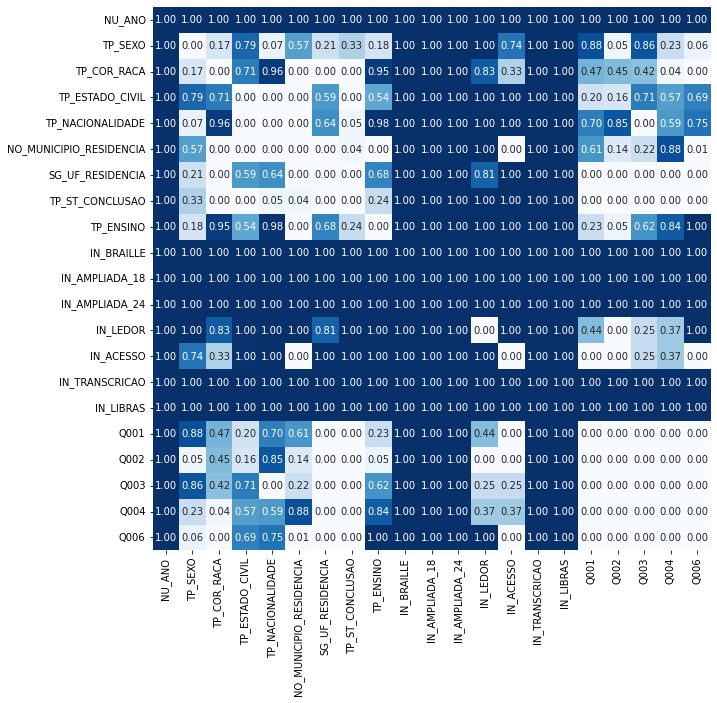

In [50]:
fig = plt.figure(figsize=(10,10))

sns.heatmap(corr_quali, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df_teste.columns, yticklabels=df_teste.columns)

In [51]:
df.loc[df['p-value'] < 0.05]

,column1,column2,p-value
22,TP_SEXO,TP_SEXO,1.238047e-247
38,TP_SEXO,Q002,4.759699e-02
44,TP_COR_RACA,TP_COR_RACA,0.000000e+00
47,TP_COR_RACA,NO_MUNICIPIO_RESIDENCIA,4.003581e-04
48,TP_COR_RACA,SG_UF_RESIDENCIA,2.038429e-30
...,...,...,...
436,Q006,Q001,3.538078e-18
437,Q006,Q002,1.889405e-16
438,Q006,Q003,4.129577e-42
439,Q006,Q004,2.831747e-27


Correlação:

Com base no teste qui² da correlação das variáveis qualitativas, quais são estatisticamente
correlacionadas com p-value > 5% de significância.

1. Com TP_COR_RACA:
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q004
    * Q005
    * Q006

2. Com TP_ESTADO_CIVIL:
    * TP_NACIONALIDADE
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO

3. Com TP_NACIONALIDADE:
    * TP_ESTADO_CIVIL
    * NO_MUNICIPIO_RESIDENCIA
    * Q003
    * Q005

4. Com NO_MUNICIPIO_RESIDENCIA:
    * TP_COR_RACA
    * TP_ESTADO_CIVIL
    * TP_NACIONALIDADE
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * TP_ENSINO
    * IN_ACESSO
    * Q005
    * Q006

5. Com SG_UF_RESIDENCIA:
    * TP_COR_RACA
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q003
    * Q004
    * Q006

6. Com TP_ST_CONCLUSAO:
    * TP_COR_RACA
    * TP_ESTADO_CIVIL
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005
    * Q006

7. Com TP_ENSINO:
    * NO_MUNICIPIO_RESIDENCIA

8. Com IN_ACESSO:
    * NO_MUNICIPIO_RESIDENCIA
    * Q001
    * Q002
    * Q006

9. Com Q001:
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * Q002
    * Q003
    * Q004
    * Q006

10. Com Q002:
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * IN_LEDOR
    * Q001
    * Q003
    * Q004
    * Q006

11. Com Q003:
    * TP_NACIONALIDADE
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q004
    * Q006

12. Com Q004:
    * TP_COR_RACA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q001
    * Q002
    * Q003
    * Q006

13. Com Q005:
    * TP_COR_RACA
    * TP_NACIONALIDADE
    * NO_MUNICIPIO_RESIDENCIA
    * TP_ST_CONCLUSAO
    * Q006

14. Com Q006:
    * TP_COR_RACA
    * NO_MUNICIPIO_RESIDENCIA
    * SG_UF_RESIDENCIA
    * TP_ST_CONCLUSAO
    * IN_ACESSO
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005


## Variáveis Explicativas e a Variável Dependente

In [52]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,2019,F,1,1,1,Contagem,MG,1,1.0,0,...,575.5,570.7,677.0,160.0,120.0,170.0,170.0,200.0,860.0,3.0
190001421548,2019,F,3,1,1,Paulo Afonso,BA,1,1.0,0,...,488.4,507.2,594.7,140.0,120.0,120.0,160.0,60.0,600.0,3.0
190001592266,2019,M,1,1,1,São Paulo,SP,2,1.0,0,...,548.1,502.5,480.7,120.0,90.0,120.0,120.0,0.0,400.0,5.0
190001475147,2019,M,4,1,1,Santa Maria,RN,1,1.0,0,...,351.7,417.6,459.0,120.0,120.0,120.0,120.0,20.0,500.0,4.0
190001867756,2019,F,1,2,1,Araucária,PR,1,1.0,0,...,393.6,451.0,484.7,120.0,90.0,90.0,100.0,0.0,300.0,3.0


### Calculando Variável Dependente

In [53]:
enem_total['NU_NOTA_MEDIA'] = (enem_total.NU_NOTA_CH + enem_total.NU_NOTA_CN + enem_total.NU_NOTA_LC + enem_total.NU_NOTA_MT)/4

### Nota de Corte ENEM:

https://www.guiadacarreira.com.br/educacao/enem/qual-e-a-nota-de-corte-do-enem-2019/

Pegando como base o link acima e a menor e a maior nota de corte:

Administração: 570 a 771
Medicina: 769 a 901

In [54]:
lista_adm = []
lista_med = []

for index, linha in enem_total.iterrows():
    if linha.NU_NOTA_MEDIA > 570:
        lista_adm.append(1)
        if linha.NU_NOTA_MEDIA > 769:
            lista_med.append(1)
        else:
            lista_med.append(0)
    else:
        lista_adm.append(0)
        lista_med.append(0)

In [55]:
enem_total['APPROVED_ADM'] = lista_adm
enem_total['APPROVED_MED'] = lista_med

In [56]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,2019,F,1,1,1,Contagem,MG,1,1.0,0,...,160.0,120.0,170.0,170.0,200.0,860.0,3.0,584.200,1,0
190001421548,2019,F,3,1,1,Paulo Afonso,BA,1,1.0,0,...,140.0,120.0,120.0,160.0,60.0,600.0,3.0,518.725,0,0
190001592266,2019,M,1,1,1,São Paulo,SP,2,1.0,0,...,120.0,90.0,120.0,120.0,0.0,400.0,5.0,518.800,0,0
190001475147,2019,M,4,1,1,Santa Maria,RN,1,1.0,0,...,120.0,120.0,120.0,120.0,20.0,500.0,4.0,436.625,0,0
190001867756,2019,F,1,2,1,Araucária,PR,1,1.0,0,...,120.0,90.0,90.0,100.0,0.0,300.0,3.0,425.775,0,0


In [57]:
enem_total.to_csv('enem_tratado.csv')

## Padronizando variáveis

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
enem_total.head()

,NU_ANO,TP_SEXO,TP_COR_RACA,TP_ESTADO_CIVIL,TP_NACIONALIDADE,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_ST_CONCLUSAO,TP_ENSINO,IN_BRAILLE,...,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA,APPROVED_ADM,APPROVED_MED
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,2019,F,1,1,1,Contagem,MG,1,1.0,0,...,160.0,120.0,170.0,170.0,200.0,860.0,3.0,584.200,1,0
190001421548,2019,F,3,1,1,Paulo Afonso,BA,1,1.0,0,...,140.0,120.0,120.0,160.0,60.0,600.0,3.0,518.725,0,0
190001592266,2019,M,1,1,1,São Paulo,SP,2,1.0,0,...,120.0,90.0,120.0,120.0,0.0,400.0,5.0,518.800,0,0
190001475147,2019,M,4,1,1,Santa Maria,RN,1,1.0,0,...,120.0,120.0,120.0,120.0,20.0,500.0,4.0,436.625,0,0
190001867756,2019,F,1,2,1,Araucária,PR,1,1.0,0,...,120.0,90.0,90.0,100.0,0.0,300.0,3.0,425.775,0,0


In [60]:
enem_total_quant = enem_total[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO',
'Q005',
'NU_NOTA_MEDIA']]

In [61]:
enem_total_quant.iloc[:, :] = StandardScaler().fit_transform(enem_total_quant)

enem_total_quant

C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\DESKTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190001237802,0.025038,0.430864,0.743696,0.715873,1.475362,1.531819,-0.455473,1.905869,1.678562,1.765516,1.638358,-0.610414,1.079994
190001421548,0.025038,0.032918,-0.452761,-0.506077,0.694142,0.583889,-0.455473,-0.229759,1.276303,-0.740683,-0.091095,-0.610414,0.063155
190001592266,-0.960845,0.846649,0.367314,-0.596521,-0.387986,-0.364042,-1.735008,-0.229759,-0.332733,-1.814768,-1.421443,0.854579,0.064319
190001475147,-0.566491,0.493987,-2.330553,-2.230278,-0.593970,-0.364042,-0.455473,-0.229759,-0.332733,-1.456740,-0.756269,0.122083,-1.211875
190001867756,0.222215,-1.487511,-1.754990,-1.587552,-0.350016,-0.364042,-1.735008,-1.511136,-1.137250,-1.814768,-2.086618,-0.610414,-1.380377
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190001606188,-0.763668,-0.992137,0.528032,0.051979,-0.396529,-0.364042,-0.455473,-0.229759,0.471785,0.333402,0.041940,0.122083,-0.283169
190001871209,-0.369315,-1.066237,-0.966509,-0.121211,-0.387986,-0.364042,-0.455473,-1.084010,-0.332733,-1.456740,-0.889304,-1.342910,-0.758005
190001259272,-0.566491,0.858999,0.580231,-0.080800,0.265088,-1.785939,-1.735008,-1.511136,-1.539509,-1.814768,-2.419205,0.854579,0.499165


## Dummies

In [62]:
enem_total_quali = enem_total[[
'NU_ANO',
'TP_SEXO',
'TP_COR_RACA',
'TP_ESTADO_CIVIL',
'TP_NACIONALIDADE',
'NO_MUNICIPIO_RESIDENCIA',
'SG_UF_RESIDENCIA',
'TP_ST_CONCLUSAO',
'TP_ENSINO',
'IN_BRAILLE',
'IN_AMPLIADA_18',
'IN_AMPLIADA_24',
'IN_LEDOR',
'IN_ACESSO',
'IN_TRANSCRICAO',
'IN_LIBRAS',
'Q001',
'Q002',
'Q003',
'Q004',
'Q006',
'APPROVED_ADM',
'APPROVED_MED']]

In [63]:
enem_total_quali = pd.get_dummies(enem_total_quali)

In [64]:
enem_total_quali

,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,APPROVED_ADM,APPROVED_MED,NU_ANO_2019,...,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_M,Q006_O,Q006_P,Q006_Q
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
190001421548,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001592266,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
190001475147,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001867756,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190001606188,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001871209,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001259272,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Dataframes Finais

In [65]:
# Qualis Dummizadas
enem_total_quali.to_csv('src/enem_total_quali.csv')

enem_total_quali.head()

,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,APPROVED_ADM,APPROVED_MED,NU_ANO_2019,...,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_M,Q006_O,Q006_P,Q006_Q
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
190001421548,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001592266,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
190001475147,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
190001867756,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# Quantis Padronizadas

enem_total_quant_2 = enem_total[['NU_IDADE',
'NU_NOTA_CN',
'NU_NOTA_CH',
'NU_NOTA_LC',
'NU_NOTA_MT',
'NU_NOTA_COMP1',
'NU_NOTA_COMP2',
'NU_NOTA_COMP3',
'NU_NOTA_COMP4',
'NU_NOTA_COMP5',
'NU_NOTA_REDACAO',
'Q005',
'NU_NOTA_MEDIA']]

enem_total_quant_2.to_csv('src/enem_total_quant.csv')

enem_total_quant_2.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190001237802,22.0,513.6,575.5,570.7,677.0,160.0,120.0,170.0,170.0,200.0,860.0,3.0,584.200
190001421548,22.0,484.6,488.4,507.2,594.7,140.0,120.0,120.0,160.0,60.0,600.0,3.0,518.725
190001592266,17.0,543.9,548.1,502.5,480.7,120.0,90.0,120.0,120.0,0.0,400.0,5.0,518.800
190001475147,19.0,518.2,351.7,417.6,459.0,120.0,120.0,120.0,120.0,20.0,500.0,4.0,436.625
190001867756,23.0,373.8,393.6,451.0,484.7,120.0,90.0,90.0,100.0,0.0,300.0,3.0,425.775


In [67]:
# Quantis Padronizadas
enem_total_quant.to_csv('src/enem_total_quant_pad.csv')

enem_total_quant.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,
190001237802,0.025038,0.430864,0.743696,0.715873,1.475362,1.531819,-0.455473,1.905869,1.678562,1.765516,1.638358,-0.610414,1.079994
190001421548,0.025038,0.032918,-0.452761,-0.506077,0.694142,0.583889,-0.455473,-0.229759,1.276303,-0.740683,-0.091095,-0.610414,0.063155
190001592266,-0.960845,0.846649,0.367314,-0.596521,-0.387986,-0.364042,-1.735008,-0.229759,-0.332733,-1.814768,-1.421443,0.854579,0.064319
190001475147,-0.566491,0.493987,-2.330553,-2.230278,-0.593970,-0.364042,-0.455473,-0.229759,-0.332733,-1.456740,-0.756269,0.122083,-1.211875
190001867756,0.222215,-1.487511,-1.754990,-1.587552,-0.350016,-0.364042,-1.735008,-1.511136,-1.137250,-1.814768,-2.086618,-0.610414,-1.380377


In [68]:
# Total com Dummies e Padronização
enem_total_dum_pad = pd.concat([enem_total_quali, enem_total_quant], axis=1)

enem_total_dum_pad.to_csv('src/enem_total_dum_pad.csv')

enem_total_dum_pad.head()

,IN_BRAILLE,IN_AMPLIADA_18,IN_AMPLIADA_24,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,APPROVED_ADM,APPROVED_MED,NU_ANO_2019,...,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,NU_NOTA_MEDIA
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
190001237802,0,0,0,0,0,0,0,1,0,1,...,0.715873,1.475362,1.531819,-0.455473,1.905869,1.678562,1.765516,1.638358,-0.610414,1.079994
190001421548,0,0,0,0,0,0,0,0,0,1,...,-0.506077,0.694142,0.583889,-0.455473,-0.229759,1.276303,-0.740683,-0.091095,-0.610414,0.063155
190001592266,0,0,0,0,0,0,0,0,0,1,...,-0.596521,-0.387986,-0.364042,-1.735008,-0.229759,-0.332733,-1.814768,-1.421443,0.854579,0.064319
190001475147,0,0,0,0,0,0,0,0,0,1,...,-2.230278,-0.593970,-0.364042,-0.455473,-0.229759,-0.332733,-1.456740,-0.756269,0.122083,-1.211875
190001867756,0,0,0,0,0,0,0,0,0,1,...,-1.587552,-0.350016,-0.364042,-1.735008,-1.511136,-1.137250,-1.814768,-2.086618,-0.610414,-1.380377


In [69]:
enem_total.to_csv('src/enem_total.csv')